In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

In [2]:
alpha = 0.1
beta = 0.15
a0 = -12.7
#H2: a > a0
sigma0 = 3.5
#H3: sigma > sigma0
a1 = -11.9
#H1: a = a1
sigma1 = 3.8
eps = 0.1
n = 120

df = pd.read_csv("MS_5-6.csv", header=None, encoding='utf-8')
df.head()
data = df.iloc[:, 0].to_numpy()

sample_mean = np.mean(data)
sample_std = 1/(n - 1) * np.sum((data - sample_mean)**2)

In [3]:
A = (1 - beta)/alpha
B = beta / (1 - alpha)
print(A, B)

8.5 0.16666666666666666


0.11279754945770057 1.9201627965195536


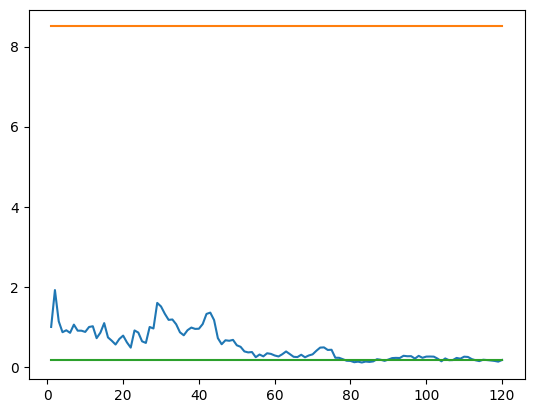

In [4]:
# def Z_j(X, j, a0, a1, sigma1):
#     j = int(j)
#     Z = 1.0
#     
#     constant = (a0**2 - a1**2) / (2 * sigma1**2)
#     
#     for i in range(1, j + 1):
#         z_i = sum(X[:i])
#         exponent = i * constant + ((a1 - a0) / (sigma1**2)) * z_i
#         Z *= np.exp(exponent)
#     
#     return Z

def Z_j(X, j, a0, a1, sigma1):
    j = int(j)
    L1 = 1
    L2 = 1
    for i in range(0, j):
        L1 *= stats.norm.pdf(X[i], a0, sigma1)
    for i in range(0, j):
        L2 *= stats.norm.pdf(X[i], a1, sigma1)
    return L1 / L2

x = np.linspace(1, 120, 120)
Z = [Z_j(data, j, a0, a1, sigma1) for j in range(len(x))]
print(min(Z), max(Z))
plt.plot(x, Z)
plt.plot(x, [A for i in x])
plt.plot(x, [B for i in x])

In [5]:
M1 = (a1 - a0)**2 / 2 / sigma1 ** 2
M0 = -(a1 - a0)**2 / 2 / sigma1 ** 2
M_a1_v = (beta * np.log(B) + (1 - beta) * np.log(A)) / M1 
M_a0_v = (alpha * np.log(A) + (1 - alpha) * np.log(B)) / M0
print("M_v_a0:", M_a0_v)
print("M_v_a1:", M_a1_v)


M_v_a0: 63.11078288124762
M_v_a1: 69.95694087626661


![](Criterion.png)
![](Criterion2.png)


In [6]:
C1 = -12.255441355998602
C = np.exp(C1 * (a1 - a0) * n / sigma1**2 + n * (a0 ** 2 - a1**2)/2/sigma1**2)
print(C)
print(Z_j(data, 120, a0, a1, sigma1))

1.3447858114284261
0.1666228905106028


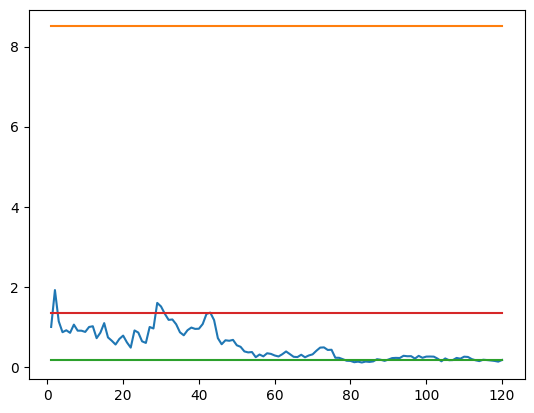

In [7]:
plt.plot(x, Z)
plt.plot(x, [A for i in x])
plt.plot(x, [B for i in x])
plt.plot(x, [C for i in x])